In [1]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

In [2]:
from matplotlib import pyplot as plt

def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

In [3]:
import math
from linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """The negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

In [4]:
from typing import List

def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta)
               for x, y in zip(xs, ys))

In [5]:
from linear_algebra import vector_sum

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The j-th partial derivative for one data pont
    here i is the index of the data point
    """
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient for one data point
    """
    return [_negative_log_partial_j(x, y, beta, j)
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

### main()

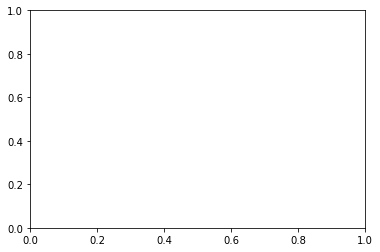

In [6]:
from matplotlib import pyplot as plt
plt.close()
plt.clf()
plt.gca().clear()

In [16]:
from matplotlib import pyplot as plt
from working_with_data import rescale
from multiple_regression import least_squares_fit, predict
from gradient_descent import gradient_step

learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]

plt.scatter(predictions, ys)
plt.xlabel("predicted")
plt.ylabel("actual")
# plt.show()


plt.savefig('im/linear_regression_for_probabilities.png')
plt.close()

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 683.22it/s]


In [17]:
from machine_learning import train_test_split
import random
import tqdm

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)

learning_rate = 0.01

# pick a random starting point
beta = [random.random() for _ in range(3)]

with tqdm.trange(5000) as t:
    for epoch in t:
        gradient = negative_log_gradient(x_train, y_train, beta)
        beta = gradient_step(beta, gradient, -learning_rate)
        loss = negative_log_likelihood(x_train, y_train, beta)
        t.set_description(f"loss: {loss:.3f} beta: {beta}")

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]: 100%|██████████| 5000/5000 [00:16<00:00, 304.88it/s]  


In [18]:
from working_with_data import scale
    
means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
                  - beta[1] * means[1] / stdevs[1]
                  - beta[2] * means[2] / stdevs[2]),
                 beta[1] / stdevs[1],
                 beta[2] / stdevs[2]]
# [8.9, 1.6, -0.000288]



assert (negative_log_likelihood(xs, ys, beta_unscaled) ==
        negative_log_likelihood(rescaled_xs, ys, beta))

In [19]:
true_positives = false_positives = true_negatives = false_negatives = 0
    
for x_i, y_i in zip(x_test, y_test):
    prediction = logistic(dot(beta, x_i))

    if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid
        true_positives += 1
    elif y_i == 1:                      # FN: paid and we predict unpaid
        false_negatives += 1
    elif prediction >= 0.5:             # FP: unpaid and we predict paid
        false_positives += 1
    else:                               # TN: unpaid and we predict unpaid
        true_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)



print(precision, recall)

assert precision == 0.75
assert recall == 0.8

0.75 0.8


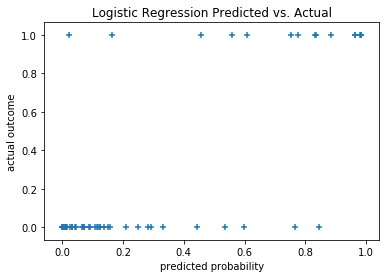

In [22]:
plt.clf()
plt.gca().clear()

predictions = [logistic(dot(beta, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()



#plt.savefig('im/logistic_regression_predicted_vs_actual.png')
#plt.gca().clear()